**Lab 5**                                                         
**AIE21128**                                                                  
T.Harshitha

In [1]:
import librosa
import IPython.display as ipd

In [2]:
filename="Audio.wav"
ipd.Audio(filename)

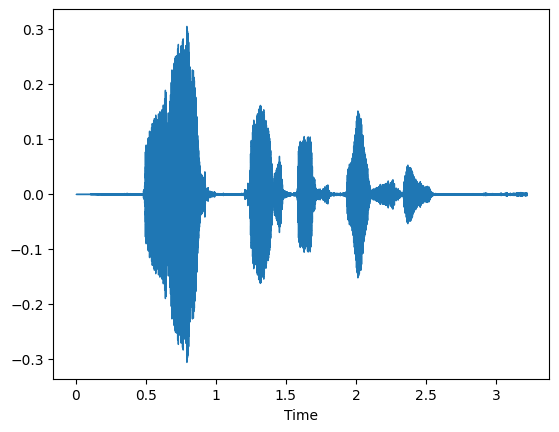

In [3]:
y, sr = librosa.load(filename)
librosa.display.waveshow(y)

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the
amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse
transform the frequency spectrum to time domain signal.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
fft_s=np.fft.fft(y, n=None, axis=-1, norm=None)
print(fft_s)

[ 0.63851553+5.13478149e-15j  0.04392769-1.05778690e-01j
 -0.19598561-4.72799927e-02j ... -0.14655096-3.08949967e-02j
 -0.19598561+4.72799927e-02j  0.04392769+1.05778690e-01j]


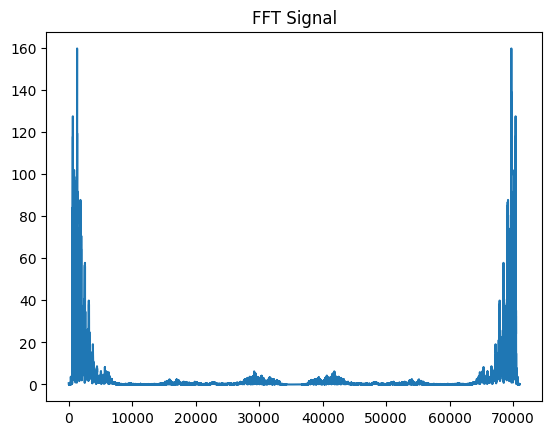

In [5]:
amp=np.abs(fft_s)
plt.plot(amp)
plt.title('FFT Signal')
plt.show()

In [6]:
ifft_s=np.fft.ifft(fft_s, n=None, axis=-1, norm=None)
print(ifft_s)

[ 6.93889390e-18-4.68375339e-17j  2.77538877e-17+3.81651440e-17j
 -8.68159656e-18+4.51012752e-17j ... -1.16225821e-03+1.45395323e-17j
 -1.54696254e-03+1.72976833e-17j  6.93950769e-18-1.38774809e-17j]


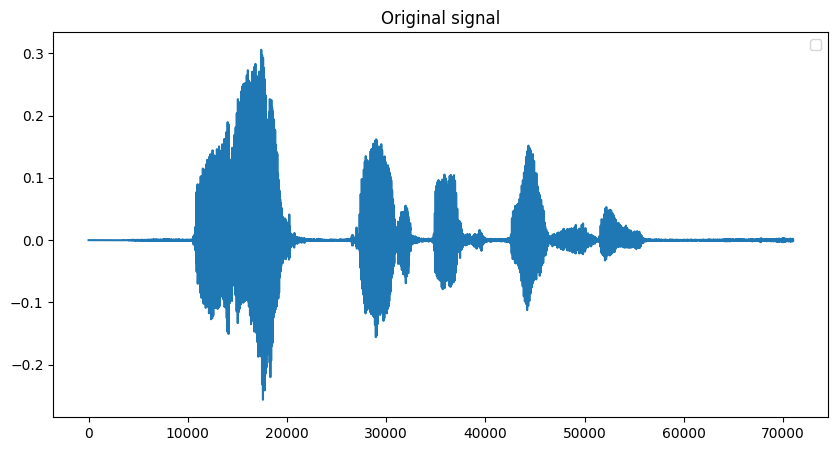

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


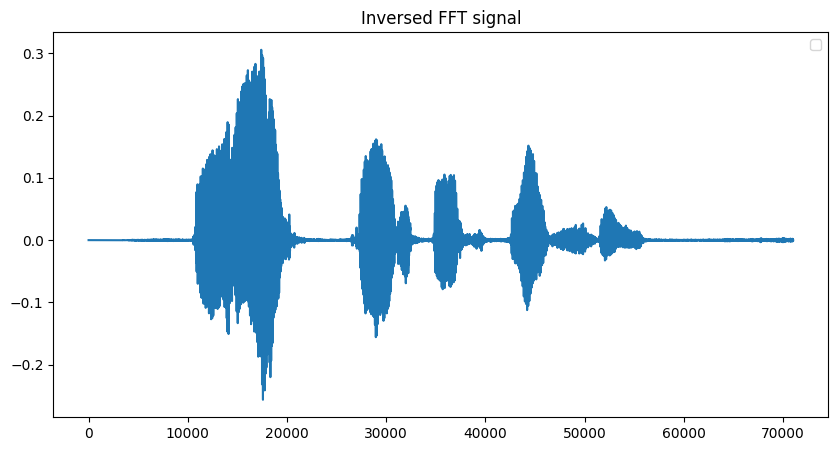

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(y)
plt.title('Original signal')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ifft_s)
plt.title('Inversed FFT signal')
plt.legend()
plt.show()

# We can observe IFFT signal is same as original signal

A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse
transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high
pass frequencies of spectrum.

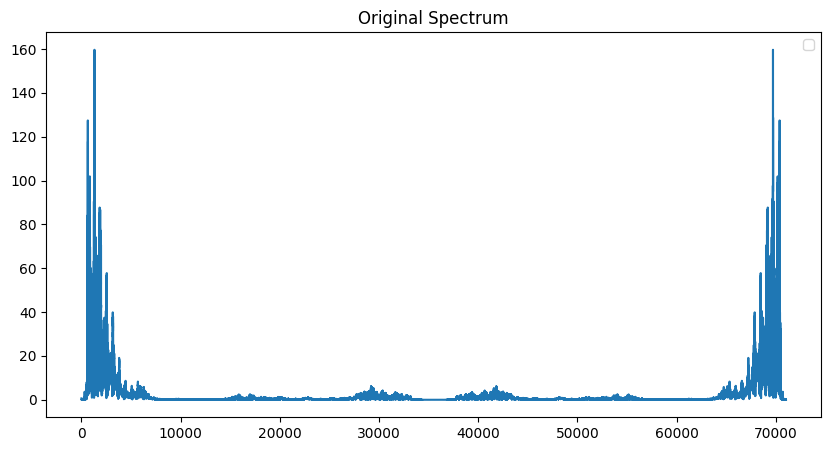

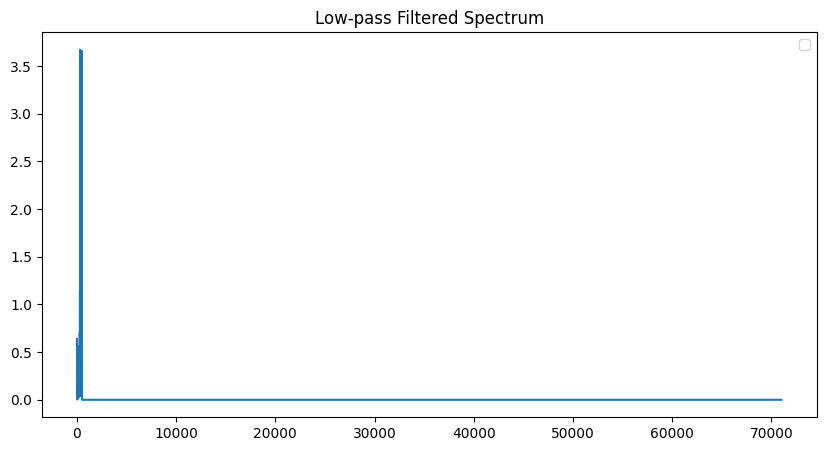

In [34]:
# for low-pass filter
low_pass= np.ones_like(fft_s)
low_pass_cutoff = 500
low_pass[low_pass_cutoff:] = 0

# Apply the window to the spectrum
spectrum_low = fft_s * low_pass

## Apply IFFT
signal_low = np.fft.ifft(spectrum_low)

# original spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(fft_s))
plt.title('Original Spectrum')
plt.legend()
plt.show()

# Plot the low-pass filtered spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectrum_low))
plt.title('Low-pass Filtered Spectrum')
plt.legend()
plt.show()


High pass filter

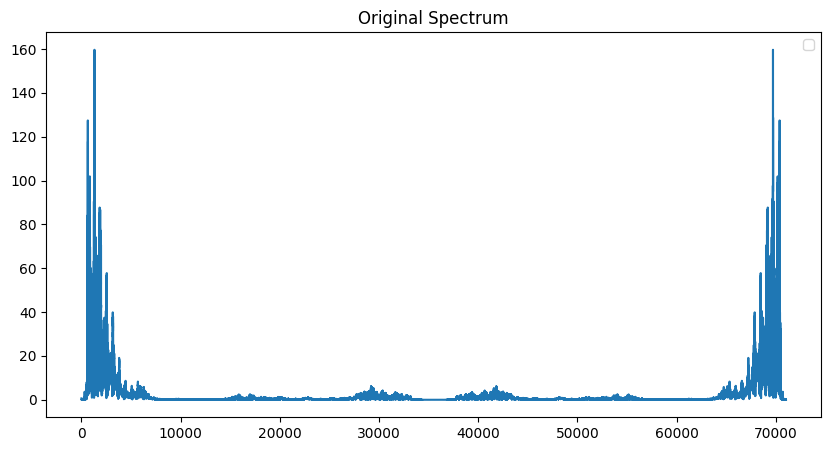

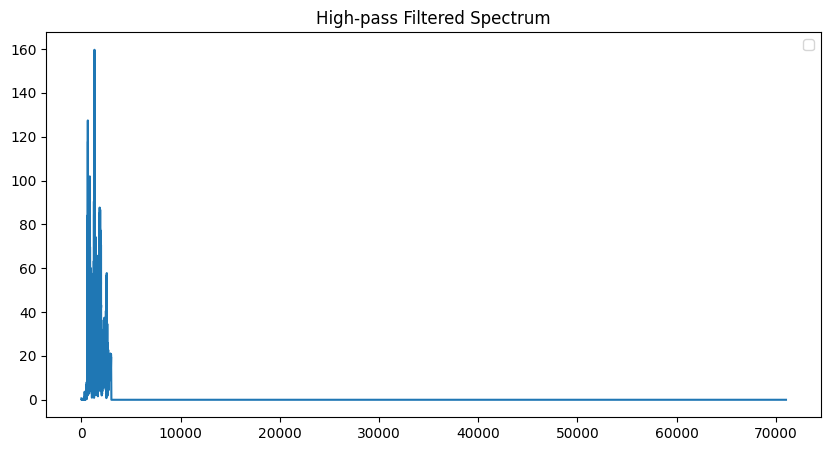

In [36]:
# High-pass filter
high_pass= np.zeros_like(fft_s)
high_pass_cutoff = 3000
high_pass[:high_pass_cutoff] = 1

# Apply the window to the spectrum
spectrum_high = fft_s * high_pass

# Inverse transform
filtered_signal_high = np.fft.ifft(spectrum_high)

# original spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(fft_s))
plt.title('Original Spectrum')
plt.legend()
plt.show()

# Plot the high-pass spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectrum_high))
plt.title('High-pass Filtered Spectrum')
plt.legend()
plt.show()

Band pass filter

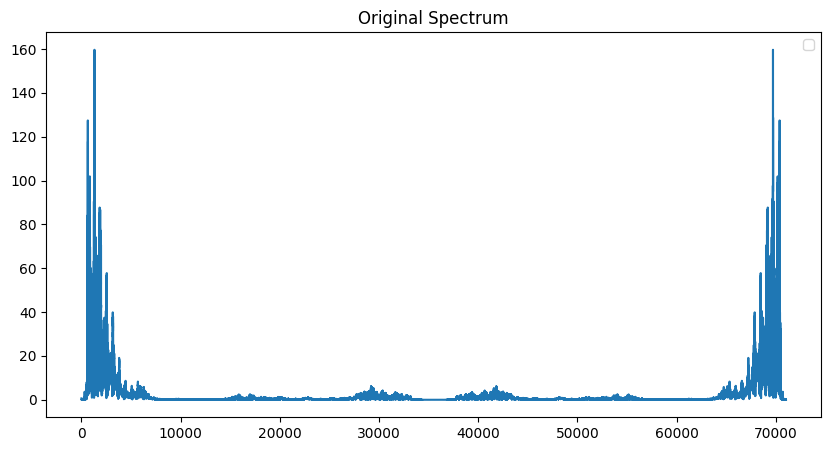

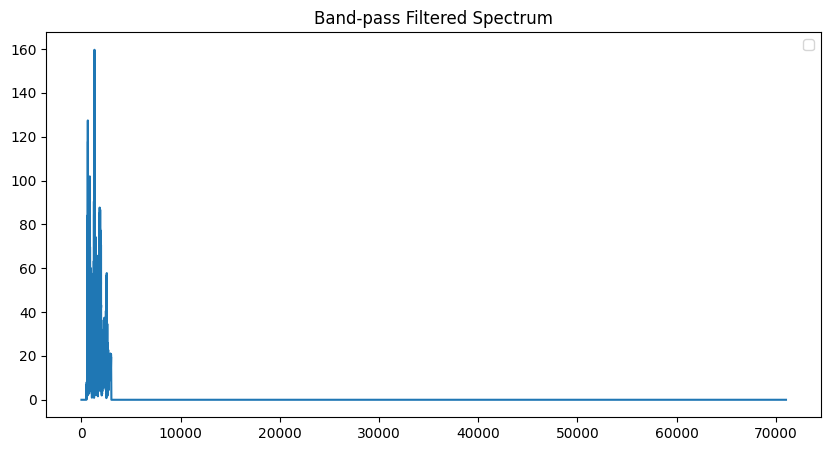

In [37]:
# bandpass filter
bandpass_window = np.zeros_like(fft_s)
bandpass_low_cutoff = 500
bandpass_high_cutoff = 3000
bandpass_window[bandpass_low_cutoff:bandpass_high_cutoff] = 1

# Apply the window to the spectrum
spectrum_bandpass = fft_s * bandpass_window

# Inverse transform
signal_bandpass = np.fft.ifft(spectrum_bandpass)

# original spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(fft_s))
plt.title('Original Spectrum')
plt.legend()
plt.show()

# Plot the band-pass
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectrum_bandpass))
plt.title('Band-pass Filtered Spectrum')
plt.legend()
plt.show()

A2. Repeat A2 with other filter types such as Cosine / Gausian filters.

Using Cosine Window

<ipython-input-45-e846d7926b38>:6: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_window = cosine(len(fft_s))
<ipython-input-45-e846d7926b38>:13: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_window_low = cosine(len(fft_s))
<ipython-input-45-e846d7926b38>:21: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_window_band = cosine(len(fft_s))


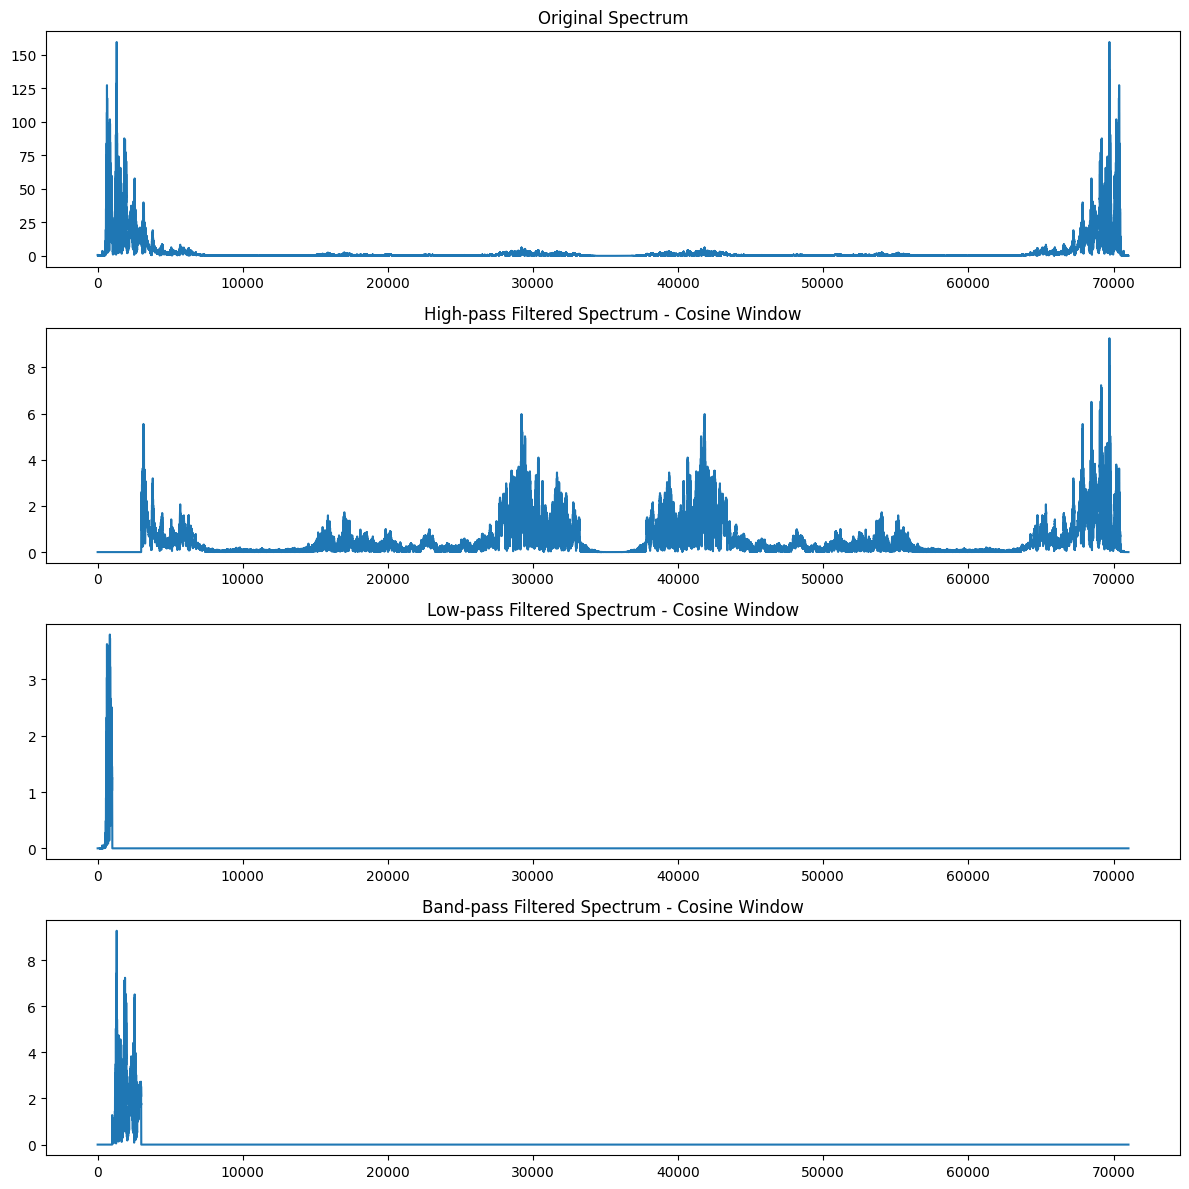

In [45]:
from scipy.fftpack import fft, ifft
from scipy.signal import cosine, gaussian

# High-pass filter using Cosine window
high_pass_cutoff = 3000
cosine_window = cosine(len(fft_s))
cosine_window[:high_pass_cutoff] = 0
spectrum_cosine_high = fft_s * cosine_window
signal_cosine_high = ifft(spectrum_cosine_high).real

# Low-pass filter using Cosine window
low_pass_cutoff = 1000
cosine_window_low = cosine(len(fft_s))
cosine_window_low[low_pass_cutoff:] = 0
spectrum_cosine_low = fft_s * cosine_window_low
signal_cosine_low = ifft(spectrum_cosine_low).real

# Band-pass filter using Cosine window
bandpass_low_cutoff = 1000
bandpass_high_cutoff = 3000
cosine_window_band = cosine(len(fft_s))
cosine_window_band[:bandpass_low_cutoff] = 0
cosine_window_band[bandpass_high_cutoff:] = 0
spectrum_cosine_bandpass = fft_s * cosine_window_band
signal_cosine_bandpass = ifft(spectrum_cosine_bandpass).real

# Plotting
plt.figure(figsize=(12, 12))

# Plot the original spectrum
plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_s))
plt.title('Original Spectrum')

# high-pass filtered spectrum using Cosine window
plt.subplot(4, 1, 2)
plt.plot(np.abs(spectrum_cosine_high))
plt.title('High-pass Filtered Spectrum - Cosine Window')

# Plot the low-pass filtered spectrum using Cosine window
plt.subplot(4, 1, 3)
plt.plot(np.abs(spectrum_cosine_low))
plt.title('Low-pass Filtered Spectrum - Cosine Window')

# Plot the band-pass filtered spectrum using Cosine window
plt.subplot(4, 1, 4)
plt.plot(np.abs(spectrum_cosine_bandpass))
plt.title('Band-pass Filtered Spectrum - Cosine Window')

plt.tight_layout()
plt.show()


Using Gaussian window

<ipython-input-47-0465d54c547d>:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_window_low = gaussian(len(fft_s), std=low_pass_cutoff/2)
<ipython-input-47-0465d54c547d>:15: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_window_high = gaussian(len(fft_s), std=high_pass_cutoff/2)
<ipython-input-47-0465d54c547d>:22: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_window_bandpass = gaussian(len(fft_s), std=(bandpass_high_cutoff-bandpass_low_cutoff

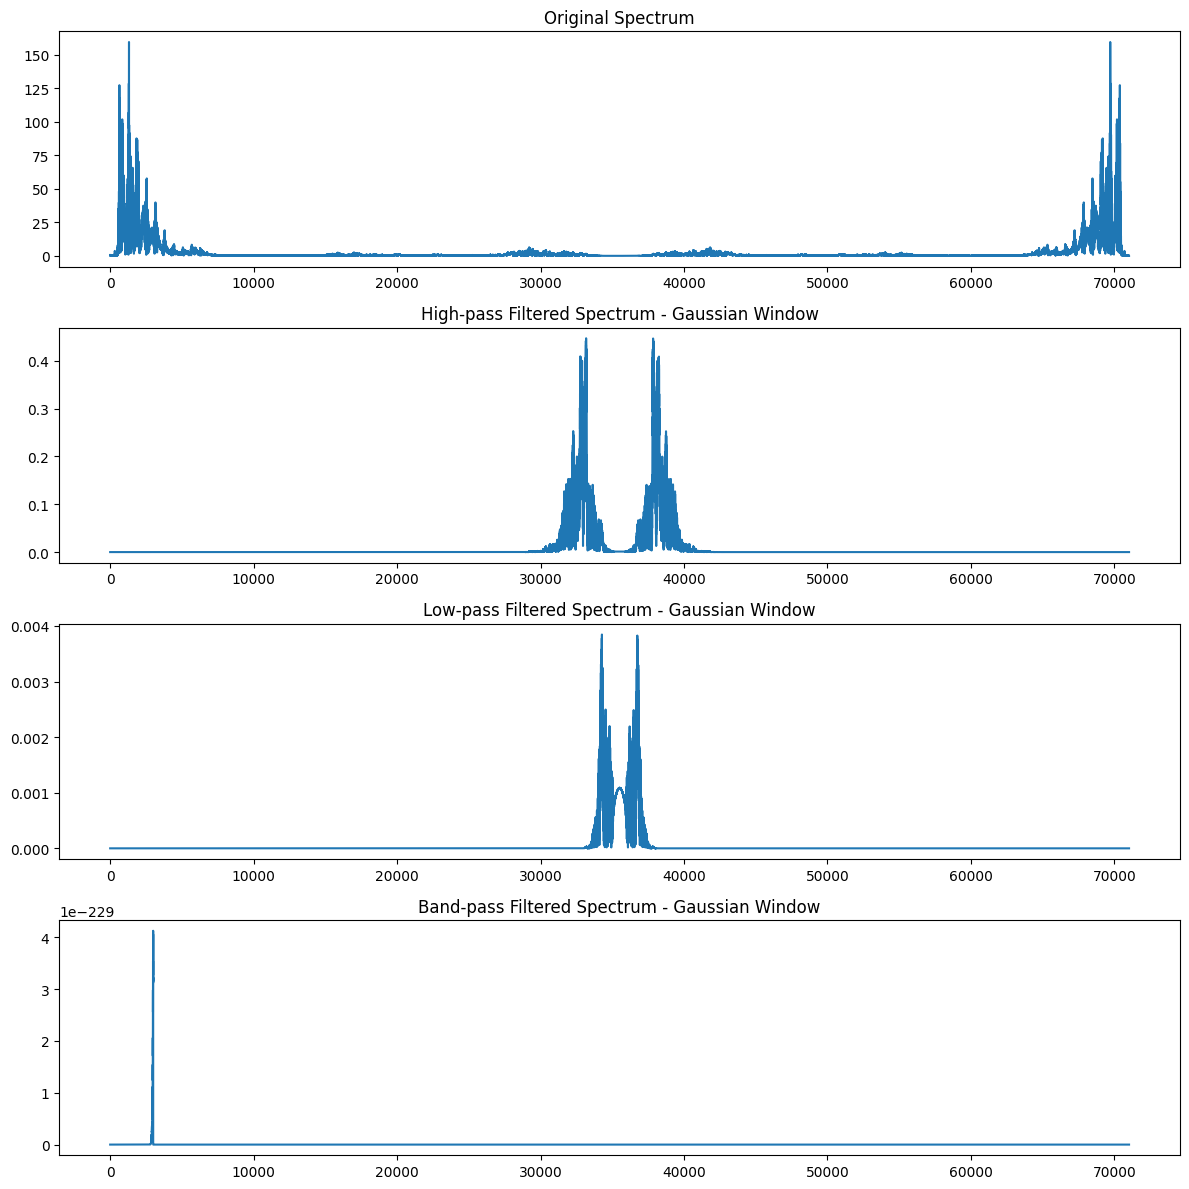

In [47]:
from scipy.fftpack import fft, ifft
from scipy.signal import gaussian
import numpy as np
import matplotlib.pyplot as plt


# Low-pass filter
low_pass_cutoff = 1000
gaussian_window_low = gaussian(len(fft_s), std=low_pass_cutoff/2)
spectrum_gaussian_low = fft_s * gaussian_window_low
signal_gaussian_low = ifft(spectrum_gaussian_low).real

# High-pass filter
high_pass_cutoff = 3000
gaussian_window_high = gaussian(len(fft_s), std=high_pass_cutoff/2)
spectrum_gaussian_high = fft_s * gaussian_window_high
signal_gaussian_high = ifft(spectrum_gaussian_high).real

# Band-pass filter
bandpass_low_cutoff = 1000
bandpass_high_cutoff = 3000
gaussian_window_bandpass = gaussian(len(fft_s), std=(bandpass_high_cutoff-bandpass_low_cutoff)/2)
gaussian_window_bandpass[:bandpass_low_cutoff] = 0
gaussian_window_bandpass[bandpass_high_cutoff:] = 0
spectrum_gaussian_bandpass = fft_s * gaussian_window_bandpass
signal_gaussian_bandpass = ifft(spectrum_gaussian_bandpass).real

# Plotting
plt.figure(figsize=(12, 12))

# Plot the original spectrum
plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_s))
plt.title('Original Spectrum')

# Plot the High-pass filtered spectrum using Gaussian window
plt.subplot(4, 1, 2)
plt.plot(np.abs(spectrum_gaussian_high))
plt.title('High-pass Filtered Spectrum - Gaussian Window')

# Plot the Low-pass filtered spectrum using Gaussian window
plt.subplot(4, 1, 3)
plt.plot(np.abs(spectrum_gaussian_low))
plt.title('Low-pass Filtered Spectrum - Gaussian Window')

# Plot the Band-pass filtered spectrum using Gaussian window
plt.subplot(4, 1, 4)
plt.plot(np.abs(spectrum_gaussian_bandpass))
plt.title('Band-pass Filtered Spectrum - Gaussian Window')

plt.tight_layout()
plt.show()
